In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind
from tqdm import tqdm
import numpy as np 
import math
%matplotlib inline

In [20]:
#Reading meta-data files
unis = pd.read_csv('../data/IPEDS/hd2020.csv',encoding='cp1252')


## Preprocessing meta-data files
### Updating names to match in rankings  
unis.loc[unis['IALIAS']=='Virginia Tech', 'INSTNM'] = 'Virginia Tech'
unis.loc[unis['INSTNM']=='University of Illinois Urbana-Champaign', 'INSTNM'] = 'University of Illinois at Urbana-Champaign'
unis.loc[(unis['INSTNM']=="St. John's College") & (unis['STABBR']=='MD'), 'INSTNM'] = "St. John's College - MD"
unis.loc[(unis['INSTNM']=="St. John's College") & (unis['STABBR']=='NM'), 'INSTNM'] = "St. John's College - NM"
unis.loc[unis['INSTNM']=="William & Mary", 'INSTNM'] = "College of William and Mary"
unis.loc[(unis['INSTNM']=="Brigham Young University") & (unis['CITY']=='Provo'), 'INSTNM'] = "Brigham Young University-Provo"
unis.loc[(unis['INSTNM']=="The University of the South") & (unis['CITY']=='Sewanee'), 'INSTNM'] = "Sewanee - The University of the South"

### Labeling 

# Making sure all institutes are captured in ranking


In [21]:
unis

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,95,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,126,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,99,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,496335,Coastline Beauty College - Hemet,,2627 West Florida Avenue Suite 100,Hemet,CA,92545-3661,6,8,,...,1,348,-2,6065,Riverside County,636,-116.999900,33.746000,-2,-2
6436,496371,Elite Welding Academy,South Point,1910 County Road One,South Point,OH,45680-8849,39,3,Bob Reeves,...,1,170,-2,39087,Lawrence County,3906,-82.594354,38.447233,217,2
6437,496380,Medspa Academies - NIMA National Institute of ...,,3993 Howard Hughes Parkway Suite 150,Las Vegas,NV,89169-6745,32,8,,...,1,332,-2,32003,Clark County,3201,-115.158153,36.117261,-2,-2
6438,496414,TechSherpas 365,,10213 Wilsky Blvd,Tampa,FL,33625,12,5,Della Wyler,...,1,-2,-2,12057,Hillsborough County,1214,-82.565846,28.042450,-1,-1


In [14]:
data.head()

,UNITID,CIPCODE,MAJORNUM,AWLEVEL,XCTOTALT,CTOTALT,XCTOTALM,CTOTALM,XCTOTALW,CTOTALW,...,XCUNKNM,CUNKNM,XCUNKNW,CUNKNW,XCNRALT,CNRALT,XCNRALM,CNRALM,XCNRALW,CNRALW
0,100654,1.0999,1,5,R,3,Z,0,R,3,...,Z,0,R,1,Z,0,Z,0,Z,0
1,100654,1.1001,1,5,R,7,R,2,R,5,...,Z,0,Z,0,Z,0,Z,0,Z,0
2,100654,1.1001,1,7,R,4,R,0,R,4,...,Z,0,Z,0,R,2,R,0,R,2
3,100654,1.1001,1,17,R,2,R,2,R,0,...,Z,0,Z,0,R,1,R,1,R,0
4,100654,1.9999,1,5,R,6,R,4,R,2,...,R,1,R,0,Z,0,Z,0,Z,0


In [13]:
data = pd.read_csv('../data/IPEDS/c2020_a.csv')
boolmap = data['CIPCODE'].apply(lambda x: x >= 11 and x < 12)
cs = data[boolmap]
sums = cs.groupby('UNITID').sum()
sums = sums.reset_index()
sums.head()

,UNITID,CIPCODE,MAJORNUM,AWLEVEL,CTOTALT,CTOTALM,CTOTALW,CAIANT,CAIANM,CAIANW,...,CWHITW,C2MORT,C2MORM,C2MORW,CUNKNT,CUNKNM,CUNKNW,CNRALT,CNRALM,CNRALW
0,100654,22.0202,2,12,29,16,13,0,0,0,...,0,0,0,0,4,2,2,3,2,1
1,100663,66.2710,6,49,114,89,25,0,0,0,...,5,2,2,0,1,1,0,28,19,9
2,100706,77.3214,8,63,177,135,42,2,2,0,...,30,1,0,1,6,6,0,25,22,3
3,100724,33.2201,3,17,43,28,15,0,0,0,...,1,0,0,0,0,0,0,3,3,0
4,100751,55.1407,6,39,119,102,17,0,0,0,...,11,6,5,1,0,0,0,15,13,2


In [44]:
merged.sort_values('women', ascending=False)[:50]

,unitid,name,women,native,black,hispanic
827,163204,University of Maryland Global Campus,1048,7,1111,387
1308,193900,New York University,800,2,49,89
2598,484613,University of Phoenix-Arizona,711,20,486,344
2131,236948,University of Washington-Seattle Campus,629,2,19,45
2665,495767,The Pennsylvania State University,616,3,105,158
1651,211440,Carnegie Mellon University,596,0,15,26
733,156365,Campbellsville University,573,0,0,0
1980,228787,The University of Texas at Dallas,544,1,34,91
944,170976,University of Michigan-Ann Arbor,543,1,28,56
466,139755,Georgia Institute of Technology-Main Campus,537,1,72,124


In [28]:
# CTOTALW = total women
# CAIANT = total native
# CBKAAT = total black
# CHISPT = hispanic total
columns = ['UNITID', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']
filtered = sums[columns]
#filtered.columns = ['unitid', 'women', 'native', 'black', 'hispanic']
merged = pd.merge(filtered, unis[['UNITID', 'INSTNM']], on = 'UNITID', how='left')
#merged[['un', 'INSTNM', 'women', 'native', 'black', 'hi]
merged = merged[['UNITID', 'INSTNM', 'CTOTALW', 'CAIANT', 'CBKAAT', 'CHISPT']]
merged.columns = ['unitid', 'name', 'women', 'native', 'black', 'hispanic']
merged


,unitid,name,women,native,black,hispanic
0,100654,Alabama A & M University,13,0,21,0
1,100663,University of Alabama at Birmingham,25,0,10,6
2,100706,University of Alabama in Huntsville,42,2,7,3
3,100724,Alabama State University,15,0,39,0
4,100751,The University of Alabama,17,0,6,3
...,...,...,...,...,...,...
2663,494287,EDP University of Puerto Rico-Manati,0,0,0,4
2664,495013,Western Maricopa Education Center,1,0,0,3
2665,495767,The Pennsylvania State University,616,3,105,158
2666,496186,California Institute of Arts & Technology-Nati...,1,0,1,1


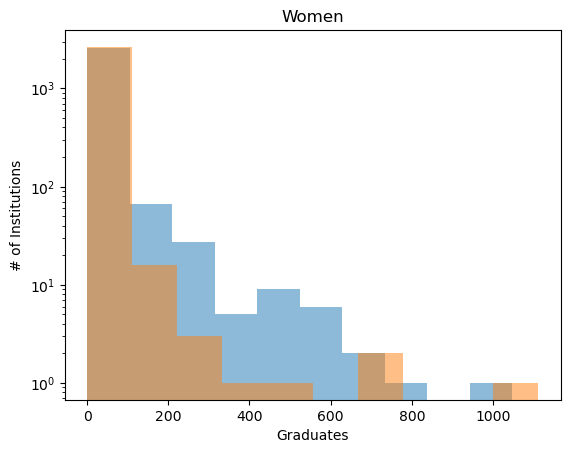

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting 

In [49]:
plt.hist(merged['women'], label = 'women', alpha = 0.5)
plt.yscale('log')
plt.title('Women')
plt.xlabel('Graduates')
plt.ylabel('# of Institutions')
boolmap_women = merged['women']==merged['women'].max()
women = merged[boolmap_women]
women['name']
plt.hist(merged['black'], label = 'black', alpha = 0.5)
plt.legend?

